# Introducing Keras
>  In this first chapter, you will get introduced to neural networks, understand what kind of problems they can solve, and when to use them. You will also build several networks and save the earth by training a regression model that approximates the orbit of a meteor that is approaching us!

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Introduction to Deep Learning with Keras" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## What is Keras?

### Describing Keras

<p>Which of the following statements about Keras is <strong>false</strong>?</p>

<pre>
Possible Answers

Keras is integrated into TensorFlow, that means you can call Keras from within TensorFlow and get the best of both worlds.

<b>Keras can work well on its own without using a backend, like TensorFlow.</b>

Keras is an open source project started by François Chollet.

</pre>

**Keras is a wrapper around a backend library, so a backend like TensorFlow, Theano, CNTK, etc must be provided.**

### Would you use deep learning?

<p>Imagine you're building an app that allows you to take a picture of your clothes and then shows you a pair of shoes that would match well. This app needs a machine learning module that's in charge of identifying the type of clothes you are wearing, as well as their color and texture. Would you use deep learning to accomplish this task?</p>

<pre>
Possible Answers

I'd use deep learning, since we are dealing with tabular data and neural networks work well with images.

<b>I'd use deep learning since we are dealing with unstructured data and neural networks work well with images.</b>

This task can be easily accomplished with other machine learning algorithms, so deep learning is not required.

</pre>

**Using deep learning would be the easiest way. The model would generalize well if enough clothing images are provided.**

## Your first neural network

### Hello nets!

<div class=""><p>You're going to build a simple neural network to get a feeling of how quickly it is to accomplish this in Keras. </p>
<p>You will build a network that <strong>takes two numbers as an input</strong>, passes them through <strong>a hidden layer of 10 neurons</strong>, and finally <strong>outputs a single non-constrained number</strong>. </p>
<p>A <strong>non-constrained output can be obtained by avoiding setting an activation function in the output layer</strong>. This is useful for problems like regression, when we want our output to be able to take any non-constrained value.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/2aa35161b566e1dacd30137a9bf4bcba023ec1e0/hello_nets.png" width="500px">
</center><p></p></div>

Instructions
<ul>
<li>Import the <code>Sequential</code> model from <code>keras.models</code> and the <code>Dense</code>layer from <code>keras.layers</code>.</li>
<li>Create an instance of the <code>Sequential</code> model.</li>
<li>Add a 10-neuron hidden <code>Dense</code> layer with an <code>input_shape</code> of two neurons.</li>
<li>Add a final 1-neuron output layer and summarize your model with <code>summary()</code>.</li>
</ul>

In [2]:
# Import the Sequential model and Dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


## Counting parameters

<div class=""><p>You've just created a neural network. But you're going to create a new one now, taking some time to think about the weights of each layer. The Keras <code>Dense</code> layer and the <code>Sequential</code> model are already loaded for you to use. </p>
<p>This is the network you will be creating:
</p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/9fd8a453d92bd8004c23ba415373c461f873913d/counting_parameters.png" width="300px">
</center><p></p></div>

Instructions 1/2
<ul>
<li>Instantiate a new <code>Sequential()</code> model.</li>
<li>Add a <code>Dense()</code> layer with five neurons and three neurons as input.</li>
<li>Add a final dense layer with one neuron and no activation.</li>
</ul>

In [3]:
# Instantiate a new Sequential model
model = Sequential()

# Add a Dense layer with five neurons and three inputs
model.add(Dense(5, input_shape=(3,), activation="relu"))

# Add a final Dense layer with one neuron and no activation
model.add(Dense(1))

# Summarize your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


Instructions 2/2

Given the model you just built, which answer is correct regarding the number of weights (parameters) in the hidden layer?

<pre>

Possible Answers

There are 15 parameters, 3 for every neuron in the hidden layer.

<b>There are 20 parameters, 15 from the connections of our inputs to our hidden layer and 5 from the bias weight of each neuron in the hidden layer.</b>

There are 20 parameters, no bias weights were needed in this simple model.

</pre>

### Build as shown!

<div class=""><p>You will take on a final challenge before moving on to the next lesson. Build the network shown in the picture below. Prove your mastered Keras basics in no time!</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/cb59acc27b67d00078df48b5ec9d9c24744e50e9/build_as_shown.png" height="350px">
</center><p></p></div>

Instructions
<ul>
<li>Instantiate a <code>Sequential</code> model.</li>
<li>Build the input and hidden layer.</li>
<li>Add the output layer.</li>
</ul>

In [4]:
# Instantiate a Sequential model
model = Sequential()

# Build the input and hidden layer
model.add(Dense(3, input_shape=(2,), activation="relu"))

# Add the ouput layer
model.add(Dense(1))

## Surviving a meteor strike

### Specifying a model

<div class=""><p>You will build a simple regression model to predict the orbit of the meteor!</p>
<p>Your training data consist of measurements taken at time steps from <strong>-10 minutes before the impact region to +10 minutes after</strong>. Each time step can be viewed as an X coordinate in our graph, which has an associated position Y for the meteor orbit at that time step.</p>
<p><em>Note that you can view this problem as approximating a quadratic function via the use of neural networks.</em></p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/4f15cb3709395af69eee859c892c0775c610c46f/meteor_orbit_3.jpg" height="300px">
</center> <p></p>
<p>This data is stored in two numpy arrays: one called <code>time_steps</code> , what we call <em>features</em>, and another called <code>y_positions</code>, with the <em>labels</em>. 
Go on and build your model! It should be able to predict the y positions for the meteor orbit at future time steps.</p>
<p>Keras <code>Sequential</code> model and <code>Dense</code> layers are available for you to use.</p></div>

Instructions
<ul>
<li>Instantiate a <code>Sequential</code> model.</li>
<li>Add a Dense layer of 50 neurons with an input shape of 1 neuron.</li>
<li>Add two Dense layers of 50 neurons each and <code>'relu'</code> activation.</li>
<li>End your model with a Dense layer with a single neuron and no activation.</li>
</ul>

In [25]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50 , input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

**You are closer to forecasting the meteor orbit! It's important to note we aren't using an activation function in our output layer since y_positions aren't bounded and they can take any value. Your model is built to perform a regression task.**

### Training

<div class=""><p>You're going to train your first model in this course, and for a good cause! </p>
<p>Remember that <strong>before training your Keras models you need to compile them</strong>. This can be done with the <code>.compile()</code> method. The <code>.compile()</code> method takes arguments such as the <code>optimizer</code>, used for weight updating, and the <code>loss</code> function, which is what we want to minimize. Training your model is as easy as calling the <code>.fit()</code> method, passing on the <em>features</em>, <em>labels</em> and a number of <em>epochs</em> to train for. </p>
<p>The regression <code>model</code> you built in the previous exercise is loaded for you to use, along with the <code>time_steps</code> and <code>y_positions</code> data. Train it and evaluate it on this very same data, let's see if your model can learn the meteor's trajectory.</p></div>

Instructions
<ul>
<li>Compile your model making use of the <code>'adam'</code> optimizer and <code>'mse'</code> as your loss function.</li>
<li>Fit your model using the features and labels for 30 epochs.</li>
<li>Evaluate your model with the <code>.evaluate()</code> method, passing the features and labels used during training.</li>
</ul>

In [13]:
df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/df_meteor.csv')
y_positions = df['y_positions'].values
time_steps = df['time_steps'].values

In [26]:
# Compile your model
model.compile(optimizer = 'adam', loss = 'mse')

print("Training started..., this can take a while:")

# Fit your model on your data for 30 epochs
model.fit(time_steps,y_positions, epochs = 30)

# Evaluate your model 
print("Final loss value:",model.evaluate(time_steps, y_positions))

Training started..., this can take a while:
Epoch 1/30
63/63 [==============================] - 0s 1ms/step - loss: 1831.3682
Epoch 2/30
63/63 [==============================] - 0s 1ms/step - loss: 492.4487
Epoch 3/30
63/63 [==============================] - 0s 1ms/step - loss: 147.3496
Epoch 4/30
63/63 [==============================] - 0s 1ms/step - loss: 124.1536
Epoch 5/30
63/63 [==============================] - 0s 1ms/step - loss: 105.3014
Epoch 6/30
63/63 [==============================] - 0s 1ms/step - loss: 88.4384
Epoch 7/30
63/63 [==============================] - 0s 1ms/step - loss: 64.1736
Epoch 8/30
63/63 [==============================] - 0s 1ms/step - loss: 43.5937
Epoch 9/30
63/63 [==============================] - 0s 1ms/step - loss: 28.2280
Epoch 10/30
63/63 [==============================] - 0s 1ms/step - loss: 17.3673
Epoch 11/30
63/63 [==============================] - 0s 2ms/step - loss: 11.2693
Epoch 12/30
63/63 [==============================] - 0s 1ms/step - l

**You can check the console to see how the loss function decreased as epochs went by. Your model is now ready to make predictions on unseen data.**

### Predicting the orbit!

<div class=""><p>You've already trained a <code>model</code> that approximates the orbit of the meteor approaching Earth and it's loaded for you to use.</p>
<p>Since you trained your model for values between -10 and 10 minutes, your model hasn't yet seen any other values for different time steps. 
You will now visualize how your model behaves on unseen data. </p>
<p>If you want to check the source code of <code>plot_orbit</code>, paste <code>show_code(plot_orbit)</code> into the console.</p>
<p>Hurry up, the Earth is running out of time!</p>
<p><em>Remember <code>np.arange(x,y)</code> produces a range of values from <strong>x</strong> to <strong>y-1</strong>. That is the <code>[x, y)</code> interval.</em></p></div>

In [27]:
def plot_orbit(model_preds):
  axeslim = int(len(model_preds)/2)
  plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1)**2,color="mediumslateblue")
  plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
  plt.axis([-40, 41, -5, 550])
  plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
  plt.title("Predicted orbit vs Scientist's Orbit")
  plt.show()

Instructions 1/2
<p>Use the model's <code>.predict()</code> method to predict from <code>-10</code> to <code>10</code> minutes.</p>

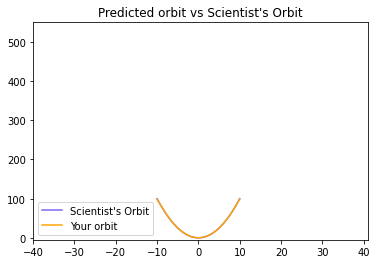

In [28]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10, 11))

# Plot the twenty minute orbit 
plot_orbit(twenty_min_orbit)

Instructions 2/2
<p>Use the model's <code>.predict()</code> method to predict from <code>-40</code> to <code>40</code> minutes.</p>

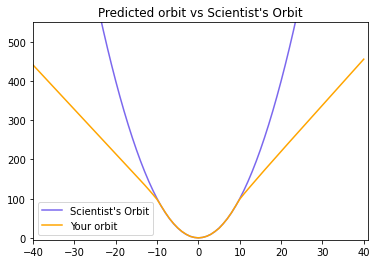

In [29]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit 
plot_orbit(eighty_min_orbit)

**Your model fits perfectly to the scientists trajectory for time values between -10 to +10, the region where the meteor crosses the impact region, so we won't be hit! However, it starts to diverge when predicting for new values we haven't trained for. This shows neural networks learn according to the data they are fed with. Data quality and diversity are very important.**